**Train a Basic Handwritten Digit Recognition Model**

Import Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

Load the MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Preprocess the Data  
* The pixel values of the images are scaled between 0 and 1 by dividing by 255.0 to normalize the data. This helps in faster convergence during training.

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Define the Model Architecture  
* Sequential is used to create a sequential model where layers are stacked sequentially.
* Flatten layer transforms the 2D array of pixel values into a 1D array.
* Dense layers are fully connected layers. The first dense layer has 128 neurons with ReLU activation, and the last layer has 10 neurons (for 10 classes) with softmax activation for probability distribution over classes.

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Compile the Model

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Visualize Sample Images  
* Displays a grid of 25 sample images from the training set using matplotlib.

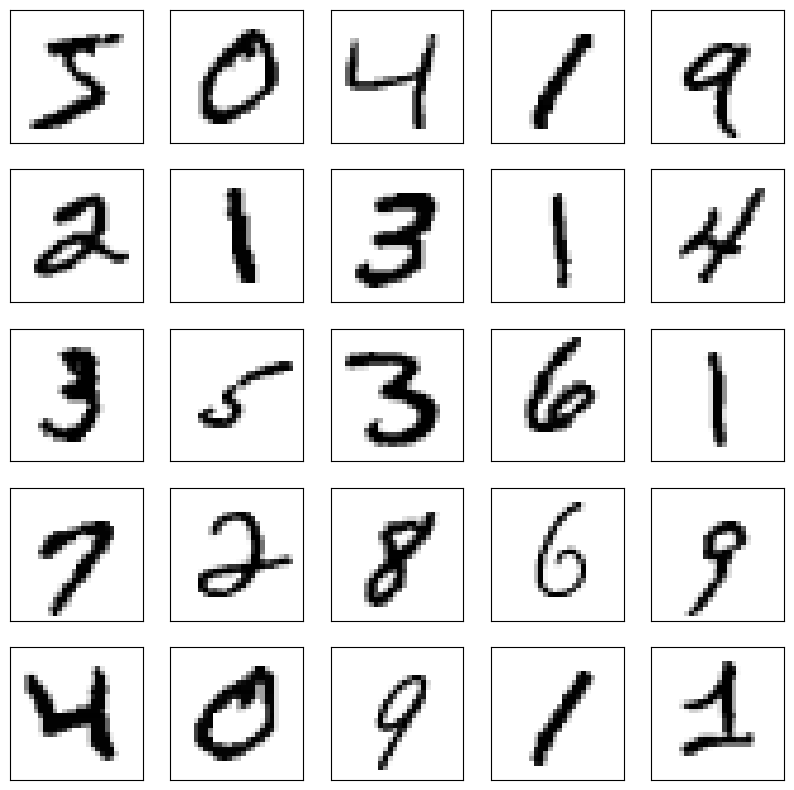

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

Train the Model

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2574 - accuracy: 0.9262 - val_loss: 0.1388 - val_accuracy: 0.9584
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1141 - accuracy: 0.9655 - val_loss: 0.1008 - val_accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9756 - val_loss: 0.0849 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0765 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9848 - val_loss: 0.0755 - val_accuracy: 0.9763


Plot Training History (accuracy and loss)

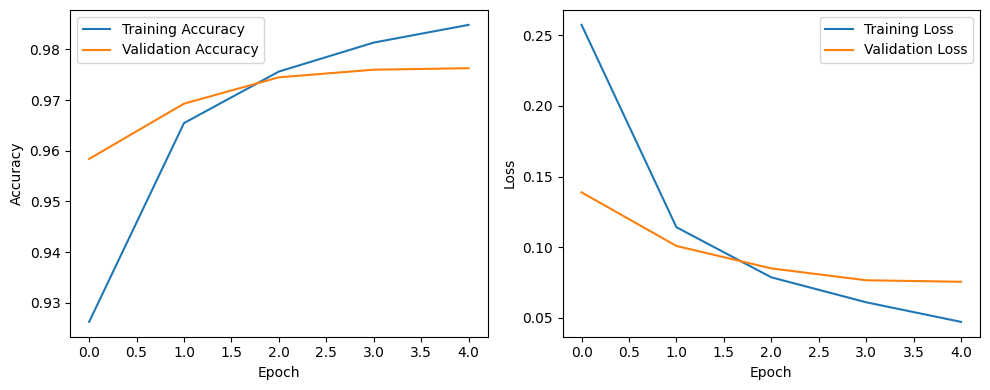

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Save the Trained Mode

In [11]:
import h5py

# Save the trained model
model.save('handwritten_trained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
